## Create a linear regression model in Python to predict the CTC/Salary of new hires from the data provided

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Extracting the training data
train_data=pd.read_excel("Data_file.xlsx")
train_data.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [3]:
# dropping unwanted colums
train_data=train_data.drop(['S.No.'], axis = 1)

In [4]:
train_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


## - Performing EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [6]:
train_data.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


### - Checking for missing values

In [7]:
train_data.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

- Here, we can see that there are no missing values in the data set

### We have 3 categorical variables in the data
        - College
        - Role
        - City type
     We need to convert them into numeric.Also, they are ordinal variables, so we will use map functions

In [8]:
train_data['College'].unique()
train_data['College']=train_data['College'].map({'Tier 1':2,'Tier 2':1,'Tier 3':0})

In [9]:
train_data['Role'].unique()
train_data['Role']=train_data['Role'].map({'Manager':1,'Executive':0})

In [10]:
train_data['City type'].unique()
train_data['City type']=train_data['City type'].map({'Metro':1,'Non-Metro':0})

In [11]:
train_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,2,1,0,55523,3,66,19,71406.576531
1,1,0,1,57081,1,84,18,68005.870631
2,1,0,1,60347,2,52,28,76764.020277
3,0,0,1,49010,2,81,33,82092.386880
4,0,0,1,57879,4,74,32,73878.097729


In [12]:
train_data.corr()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
College,1.000000,0.001472,0.002384,0.016259,0.050243,0.024994,0.006760,0.179152
Role,0.001472,1.000000,0.076185,0.021208,-0.013131,0.014541,-0.025019,0.625435
City type,0.002384,0.076185,1.000000,0.036956,-0.001568,0.018550,-0.020856,0.211258
Previous CTC,0.016259,0.021208,0.036956,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,0.050243,-0.013131,-0.001568,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,0.024994,0.014541,0.018550,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),0.006760,-0.025019,-0.020856,0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,0.179152,0.625435,0.211258,0.270260,0.007518,-0.017557,0.301569,1.000000


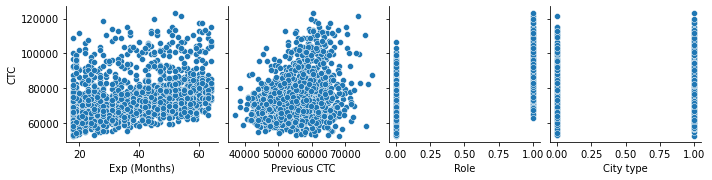

In [13]:
sns.pairplot(data=train_data,x_vars=['Exp (Months)','Previous CTC','Role','City type'],y_vars='CTC',aspect=1)
plt.show()

In [14]:
# Here we can observe that CTC is more impacted by Exp,Role and previous CTC

### lets define the target and the dependent variables

In [15]:
y=train_data[['CTC']]
x=train_data.drop(columns='CTC')

### Splitting the data into train and test

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=111)
len(x_train),len(x_test),len(y_train),len(y_test)

(936, 402, 936, 402)

### Creating linear model

In [17]:
from sklearn.linear_model import LinearRegression
MLR=LinearRegression()
MLR_model=MLR.fit(x_train,y_train)
MLR_model

LinearRegression()

In [18]:
# Here model MLR_Model is ready

In [19]:
# finding m-value
print("The intercepts value: ", MLR_model.intercept_)
print("The coefficients value: ", MLR_model.coef_)

The intercepts value:  [35506.88658489]
The coefficients value:  [[ 2.56536841e+03  1.91609728e+04  4.15944705e+03  3.70711033e-01
  -4.83734008e+01 -4.03629549e+00  2.69703143e+02]]


### Predicting the CTC using our trained model

In [20]:
y_test['Predicted CTC']=MLR_model.predict(x_test)
y_test.head()

,CTC,Predicted CTC
1000,70944.167462,83334.259356
53,92378.502641,92225.823667
432,70832.226387,76375.897150
162,83984.481546,81238.101272
1020,81962.819031,80639.801883


## Evaluating the model

In [21]:
r_square=MLR_model.score(x_train,y_train)
print(" The r_squared value is:",r_square)

 The r_squared value is: 0.5925144965834495


### Finding the errors

In [22]:
error=y_test['CTC']-y_test['Predicted CTC']
error.head()

1000   -12390.091894
53        152.678974
432     -5543.670763
162      2746.380275
1020     1323.017148
dtype: float64

In [23]:
error.skew()

0.417295362961341

### Checking the normality for errors

<AxesSubplot:ylabel='Density'>

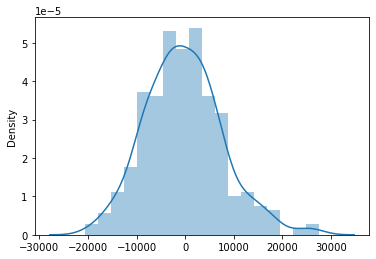

In [24]:
sns.distplot(error)

- Here, we can say that the errors are normality distributed

In [25]:
#calulating sq-error
y_test['sq_error']=error**2
y_test.head()

,CTC,Predicted CTC,sq_error
1000,70944.167462,83334.259356,1.535144e+08
53,92378.502641,92225.823667,2.331087e+04
432,70832.226387,76375.897150,3.073229e+07
162,83984.481546,81238.101272,7.542605e+06
1020,81962.819031,80639.801883,1.750374e+06


In [26]:
# calulating mean error
error_mean=y_test['sq_error'].mean()
error_mean

63923965.12564524

### Finding RMSE value for our model

In [27]:
import math
RMSE=math.sqrt(error_mean)
print("The RMSE value of the model is:",RMSE)

The RMSE value of the model is: 7995.246408063059


### As the model is ready and is evaluated, hence we will go ahead and test it using test data file

### Getting the test data file

In [28]:
test_data=pd.read_excel("Test_data_file.xlsx")
test_data.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN


### Preprocessing

In [29]:
# Renaming the columns as per train data
test_data=test_data.rename(columns={'previous CTC':'Previous CTC','previous job changes':'Previous job changes',
                                    'Actual CTC':'CTC','Exp':'Exp (Months)'})

In [30]:
# Dropping unwanted columns
test_data=test_data.drop(columns=['College_T1','College_T2','City_Metro','Role_Manager'], axis=1)

In [31]:
train_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,2,1,0,55523,3,66,19,71406.576531
1,1,0,1,57081,1,84,18,68005.870631
2,1,0,1,60347,2,52,28,76764.020277
3,0,0,1,49010,2,81,33,82092.386880
4,0,0,1,57879,4,74,32,73878.097729


In [32]:
test_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277,NaN
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880,NaN
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729,NaN


In [33]:
test_data['College']=test_data['College'].map({'Tier 3':2,'Tier 2':1,'Tier 1':0})
test_data['Role']=test_data['Role'].map({'Manager':1,'Executive':0})
test_data['City type']=test_data['City type'].map({'Metro':1,'Non-Metro':0})

### Predicting the values for test data using our trained model

In [34]:
# Creating validation data for prediction
val_data=test_data.drop(columns=['CTC','Predicted CTC'])
val_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,0,1,0,55523,3,66,19
1,1,0,1,57081,1,84,18
2,1,0,1,60347,2,52,28
3,2,0,1,49010,2,81,33
4,2,0,1,57879,4,74,32


In [35]:
# Here are the predicted values
test_data['Predicted CTC']=MLR_model.predict(val_data)
test_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Predicted CTC
0,0,1,0,55523,3,66,19,71406.576531,79963.692082
1,1,0,1,57081,1,84,18,68005.870631,67859.492879
2,1,0,1,60347,2,52,28,76764.020277,71848.054600
3,2,0,1,49010,2,81,33,82092.386880,71442.135177
4,2,0,1,57879,4,74,32,73878.097729,74391.775452


### Calculating the errors and RMSE values

In [36]:
error=test_data['CTC']-test_data['Predicted CTC']
error.head()

0    -8557.115551
1      146.377752
2     4915.965677
3    10650.251703
4     -513.677723
dtype: float64

<AxesSubplot:ylabel='Density'>

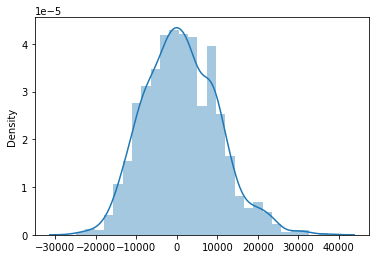

In [37]:
sns.distplot(error)

In [38]:
error.skew()

0.3432440459246068

In [39]:
sqr_error=(error)**2
MSR=sqr_error.mean()
RMSE=math.sqrt(MSR)
print("The RMSE value is:",RMSE)

The RMSE value is: 9116.179444222822


### As we get the RMSE value, lets go ahead and get the range of predicted CTC

In [40]:
test_data['Predicted Upper Range']=test_data['Predicted CTC']+RMSE
test_data['Predicted Lower Range']=test_data['Predicted CTC']-RMSE
test_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Predicted CTC,Predicted Upper Range,Predicted Lower Range
0,0,1,0,55523,3,66,19,71406.576531,79963.692082,89079.871526,70847.512638
1,1,0,1,57081,1,84,18,68005.870631,67859.492879,76975.672323,58743.313435
2,1,0,1,60347,2,52,28,76764.020277,71848.054600,80964.234044,62731.875156
3,2,0,1,49010,2,81,33,82092.386880,71442.135177,80558.314621,62325.955733
4,2,0,1,57879,4,74,32,73878.097729,74391.775452,83507.954897,65275.596008


### - Here, we can say that the predicted range of CTC could be offered as above
### - The RMSE value is: 9116.179
### - The R-Square value is: 0.592